In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

import corner

import binary_c
import xrb
from xrb.binary import binary_evolve
from xrb.src import stats
from xrb.SF_history import sf_history

from xrb.src.core import *
set_data_path("../data")


%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:

def calc_sfr_at_time(tmin=5, tmax=100, n_times=20, N_ran=int(1.0e5)):

    """ Calculate the star formation rate over the entire region at a time
    
    Parameters
    ----------
    tmin, tmax : float
        Start and end times to calculate sfr's
    n_times : int
        Number of times to calculate sfr
    N_ran : int
        Number of random samples to draw for Monte Carlo integration
        
    Returns
    -------
    sfr_ times : ndarray
        Numpy array of times
    
    sfr : ndarray
        Numpy array of star formation rates at specified times

    """


    # Calculate the integration area in steradians
    integration_area = (sf_history.ra_max-sf_history.ra_min) * \
                       (sf_history.dec_max-sf_history.dec_min) * \
                       (np.pi/180.)**2


    sfr = np.zeros(n_times)  # 20 different time samples

    for i, t in zip(np.arange(n_times), np.linspace(tmin, tmax, n_times)):

        # Generate random position coordinates
        ran_ra = (sf_history.ra_max-sf_history.ra_min) * np.random.uniform(size=N_ran) + sf_history.ra_min
        ran_dec = (sf_history.dec_max-sf_history.dec_min) * np.random.uniform(size=N_ran) + sf_history.dec_min

        # Must create a vector of times for star formation history input
        time = t * np.ones(N_ran)

        # Call star formation history function
        # sfr_temp has units of Msun/Myr/str
        sfr_temp = sf_history.get_SFH(ran_ra, ran_dec, time, sf_history.sf_coor, sf_history.sf_sfh)

        # Perform the Monte Carlo integration
        sfr[i] = np.sum(sfr_temp) / float(N_ran) * integration_area
        
    # Return times and sfr's
    return np.linspace(tmin, tmax, n_times), sfr


In [18]:
c.sf_scheme = "LMC"

###### z = 0.008 ######
sf_history.reset_sf_history()
sf_history.load_sf_history(z=0.008)
times_lmc_008, sfr_lmc_008 = calc_sfr_at_time(tmin=6.3, tmax=150)

###### z = 0.004 ######
sf_history.reset_sf_history()
sf_history.load_sf_history(z=0.004)
times_lmc_004, sfr_lmc_004 = calc_sfr_at_time(tmin=6.3, tmax=150)

###### z = 0.0025 ######
sf_history.reset_sf_history()
sf_history.load_sf_history(z=0.0025)
times_lmc_0025, sfr_lmc_0025 = calc_sfr_at_time(tmin=6.3, tmax=150)

###### z = 0.001 ######
sf_history.reset_sf_history()
sf_history.load_sf_history(z=0.001)
times_lmc_001, sfr_lmc_001 = calc_sfr_at_time(tmin=6.3, tmax=150)



c.sf_scheme = "SMC"

###### z = 0.008 ######
sf_history.reset_sf_history()
sf_history.load_sf_history(z=0.008)
times_smc_008, sfr_smc_008 = calc_sfr_at_time(tmin=6.3, tmax=150)

###### z = 0.004 ######
sf_history.reset_sf_history()
sf_history.load_sf_history(z=0.004)
times_smc_004, sfr_smc_004 = calc_sfr_at_time(tmin=6.3, tmax=150)

###### z = 0.001 ######
sf_history.reset_sf_history()
sf_history.load_sf_history(z=0.001)
times_smc_001, sfr_smc_001 = calc_sfr_at_time(tmin=6.3, tmax=150)


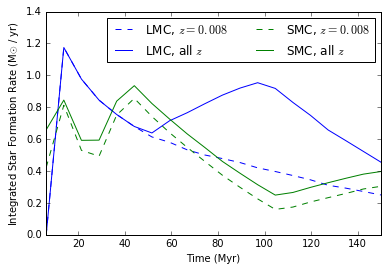

In [25]:
# LMC #
times_lmc = times_lmc_008
sfr_lmc = sfr_lmc_008 + sfr_lmc_004 + sfr_lmc_0025 + sfr_lmc_001
plt.plot(times_lmc_008, sfr_lmc_008/1.0e6, label=r'LMC, $z=0.008$', color='b', linestyle='--')
# plt.plot(times_lmc_004, sfr_lmc_004/1.0e6, label='LMC')
# plt.plot(times_lmc_0025, sfr_lmc_0025/1.0e6, label='LMC')
# plt.plot(times_lmc_001, sfr_lmc_001/1.0e6, label='LMC')
plt.plot(times_lmc, sfr_lmc/1.0e6, label=r'LMC, all $z$', color='b', linestyle='-')

# SMC #
times_smc = times_smc_008
sfr_smc = sfr_smc_008 + sfr_smc_004 + sfr_smc_001
plt.plot(times_smc_008, sfr_smc_008/1.0e6, label=r'SMC, $z=0.008$', color='g', linestyle='--')
# plt.plot(times_smc_004, sfr_smc_004/1.0e6, label='SMC')
# plt.plot(times_smc_001, sfr_smc_001/1.0e6, label='SMC')
plt.plot(times_smc, sfr_smc/1.0e6, label=r'SMC, all $z$', color='g', linestyle='-')


plt.xlabel("Time (Myr)")
plt.ylabel(r"Integrated Star Formation Rate (M$\odot$ / yr)")

plt.ylim(0, 1.4)
plt.xlim(6.3, 150)
plt.legend(ncol=2)

plt.savefig("../figures/MC_star_formation.pdf")
# plt.show()